## PROYECTO DATA SCIENCE - UDACITY
https://databank.worldbank.org/source/education-statistics-%5E-all-indicators#
Data from database: Education Statistics - All Indicators,,,,,,,,,
Last Updated: 06/25/2024,,,,,,,,,

### Librerías

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


### Lectura de la información

In [30]:
df = pd.read_csv('7a5f9cc8-40c9-46d4-bca6-8d355b52cd45_Data.csv')
df

,Country Name,Country Code,Series,Series Code,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Afghanistan,AFG,Labor force with advanced education (% of tota...,SL.TLF.ADVN.ZS,..,..,64.6766967773438,..,..,..,..,..,..,..
1,Afghanistan,AFG,"Labor force with advanced education, female (%...",SL.TLF.ADVN.FE.ZS,..,..,48.6431007385254,..,..,..,..,..,..,..
2,Afghanistan,AFG,"Labor force with advanced education, male (% o...",SL.TLF.ADVN.MA.ZS,..,..,70.1089019775391,..,..,..,..,..,..,..
3,Afghanistan,AFG,Labor force with basic education (% of total l...,SL.TLF.BASC.ZS,..,..,51.2011985778809,..,..,..,..,..,..,..
4,Afghanistan,AFG,"Labor force with basic education, female (% of...",SL.TLF.BASC.FE.ZS,..,..,17.160400390625,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,Zimbabwe,ZWE,Labor force with intermediate education (% of ...,SL.TLF.INTM.ZS,..,..,..,..,..,..,..,..,..,..
2988,Zimbabwe,ZWE,"Labor force with intermediate education, femal...",SL.TLF.INTM.FE.ZS,..,..,..,..,..,..,..,..,..,..
2989,Zimbabwe,ZWE,"Labor force with intermediate education, male ...",SL.TLF.INTM.MA.ZS,..,..,..,..,..,..,..,..,..,..
2990,Zimbabwe,ZWE,"Labor force, female (% of total labor force)",SL.TLF.TOTL.FE.ZS,50.969785711163,50.9334388269272,50.9191188648549,50.9221968606101,50.8898748847148,..,..,..,..,..


### Limpieza y transformación

In [31]:
df.columns
## Se requiere transformar la información y pivotearla, ya que está por columnas los años

Index(['Country Name', 'Country Code', 'Series', 'Series Code',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]',
       '2023 [YR2023]', '2024 [YR2024]'],
      dtype='object')

In [32]:
df['Series'].value_counts()
## Se realiza un entendimiento de las variables que se van a tener en los 10 años

Series
Labor force with advanced education (% of total labor force)                 272
Labor force with advanced education, female (% of female labor force)        272
Labor force with advanced education, male (% of male labor force)            272
Labor force with basic education (% of total labor force)                    272
Labor force with basic education, female (% of female labor force)           272
Labor force with basic education, male (% of male labor force)               272
Labor force with intermediate education (% of total labor force )            272
Labor force with intermediate education, female (% of female labor force)    272
Labor force with intermediate education, male (% of male labor force)        272
Labor force, female (% of total labor force)                                 272
Labor force, total                                                           272
Name: count, dtype: int64

In [33]:
df.dtypes
## Se hace el entendimiento del tipo de dato

Country Name     object
Country Code     object
Series           object
Series Code      object
2015 [YR2015]    object
2016 [YR2016]    object
2017 [YR2017]    object
2018 [YR2018]    object
2019 [YR2019]    object
2020 [YR2020]    object
2021 [YR2021]    object
2022 [YR2022]    object
2023 [YR2023]    object
2024 [YR2024]    object
dtype: object

In [34]:
# Se requiere transformar las columnas de años de objeto a valor entero, ya que estos son los valores a predecir
cols_anos = [col for col in df.columns if '[YR' in col]
df[cols_anos] = df[cols_anos].apply(pd.to_numeric, errors='coerce')
df[cols_anos].dtypes

2015 [YR2015]    float64
2016 [YR2016]    float64
2017 [YR2017]    float64
2018 [YR2018]    float64
2019 [YR2019]    float64
2020 [YR2020]    float64
2021 [YR2021]    float64
2022 [YR2022]    float64
2023 [YR2023]    float64
2024 [YR2024]    float64
dtype: object

In [35]:
# Hacemos un Melt para transformar columnas de años en filas y poder tener un registro único por país y año con cada una de las variables
df_long = df.melt(
    id_vars=['Country Name', 'Country Code', 'Series', 'Series Code'],
    var_name='Año',
    value_name='Valor'
)
df_long['Año'] = df_long['Año'].str.extract(r'(\d{4})').astype(int)
df_pivot = df_long.pivot_table(
    index=['Country Name', 'Country Code', 'Año'],
    columns='Series',
    values='Valor'
).reset_index()
df_pivot


Series,Country Name,Country Code,Año,Labor force with advanced education (% of total labor force),"Labor force with advanced education, female (% of female labor force)","Labor force with advanced education, male (% of male labor force)",Labor force with basic education (% of total labor force),"Labor force with basic education, female (% of female labor force)","Labor force with basic education, male (% of male labor force)",Labor force with intermediate education (% of total labor force ),"Labor force with intermediate education, female (% of female labor force)","Labor force with intermediate education, male (% of male labor force)","Labor force, female (% of total labor force)","Labor force, total"
0,Afghanistan,AFG,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.786208,9176450.0
1,Afghanistan,AFG,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.817676,9566712.0
2,Afghanistan,AFG,2017,64.676697,48.643101,70.108902,51.201199,17.1604,67.444801,51.552502,18.1922,64.681198,20.897058,9947922.0
3,Afghanistan,AFG,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.272197,10334090.0
4,Afghanistan,AFG,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.448625,10699525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Zimbabwe,ZWE,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.969786,6587744.0
1046,Zimbabwe,ZWE,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.933439,6686030.0
1047,Zimbabwe,ZWE,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.919119,6792647.0
1048,Zimbabwe,ZWE,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.922197,6907202.0


### EDA

In [36]:
df_pivot.info()
## Se revisa la completitud de las variables y se evidencia que las variables con mayor información sólo son 2  
# Labor force, female (% of total labor force)                         
# Labor force, total    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 14 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Country Name                                                               1050 non-null   object 
 1   Country Code                                                               1050 non-null   object 
 2   Año                                                                        1050 non-null   int32  
 3   Labor force with advanced education (% of total labor force)               394 non-null    float64
 4   Labor force with advanced education, female (% of female labor force)      393 non-null    float64
 5   Labor force with advanced education, male (% of male labor force)          393 non-null    float64
 6   Labor force with basic education (% of total labor force

In [37]:
# Estadísticas descriptivas
df_pivot.describe(include='all')

Series,Country Name,Country Code,Año,Labor force with advanced education (% of total labor force),"Labor force with advanced education, female (% of female labor force)","Labor force with advanced education, male (% of male labor force)",Labor force with basic education (% of total labor force),"Labor force with basic education, female (% of female labor force)","Labor force with basic education, male (% of male labor force)",Labor force with intermediate education (% of total labor force ),"Labor force with intermediate education, female (% of female labor force)","Labor force with intermediate education, male (% of male labor force)","Labor force, female (% of total labor force)","Labor force, total"
count,1050,1050,1050.000000,394.000000,393.000000,393.000000,389.000000,389.000000,388.000000,394.000000,393.000000,393.000000,1041.000000,1.041000e+03
unique,215,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2016.981905,77.891180,73.934663,81.694493,46.208201,34.884499,57.576437,64.530811,55.294795,73.211553,41.080308,1.067364e+08
std,NaN,NaN,1.416455,6.372252,9.110872,6.428517,15.331220,15.056088,16.942235,8.972880,12.172087,8.933641,9.285058,3.937072e+08
min,NaN,NaN,2015.000000,42.013599,29.211399,47.177101,15.302300,5.240000,23.479200,34.666401,10.496000,22.990000,7.679346,3.841900e+04
25%,NaN,NaN,2016.000000,74.117926,70.025703,77.315574,34.520699,22.691577,44.408624,60.032975,51.099098,68.244499,38.943495,1.316869e+06
50%,NaN,NaN,2017.000000,78.424248,75.301498,81.928001,47.303699,34.756302,55.570150,65.485352,56.297260,72.870003,44.081650,4.983536e+06
75%,NaN,NaN,2018.000000,82.361347,80.395798,86.609520,57.529999,43.479401,73.480476,70.155752,62.110001,79.410004,47.108767,2.269699e+07


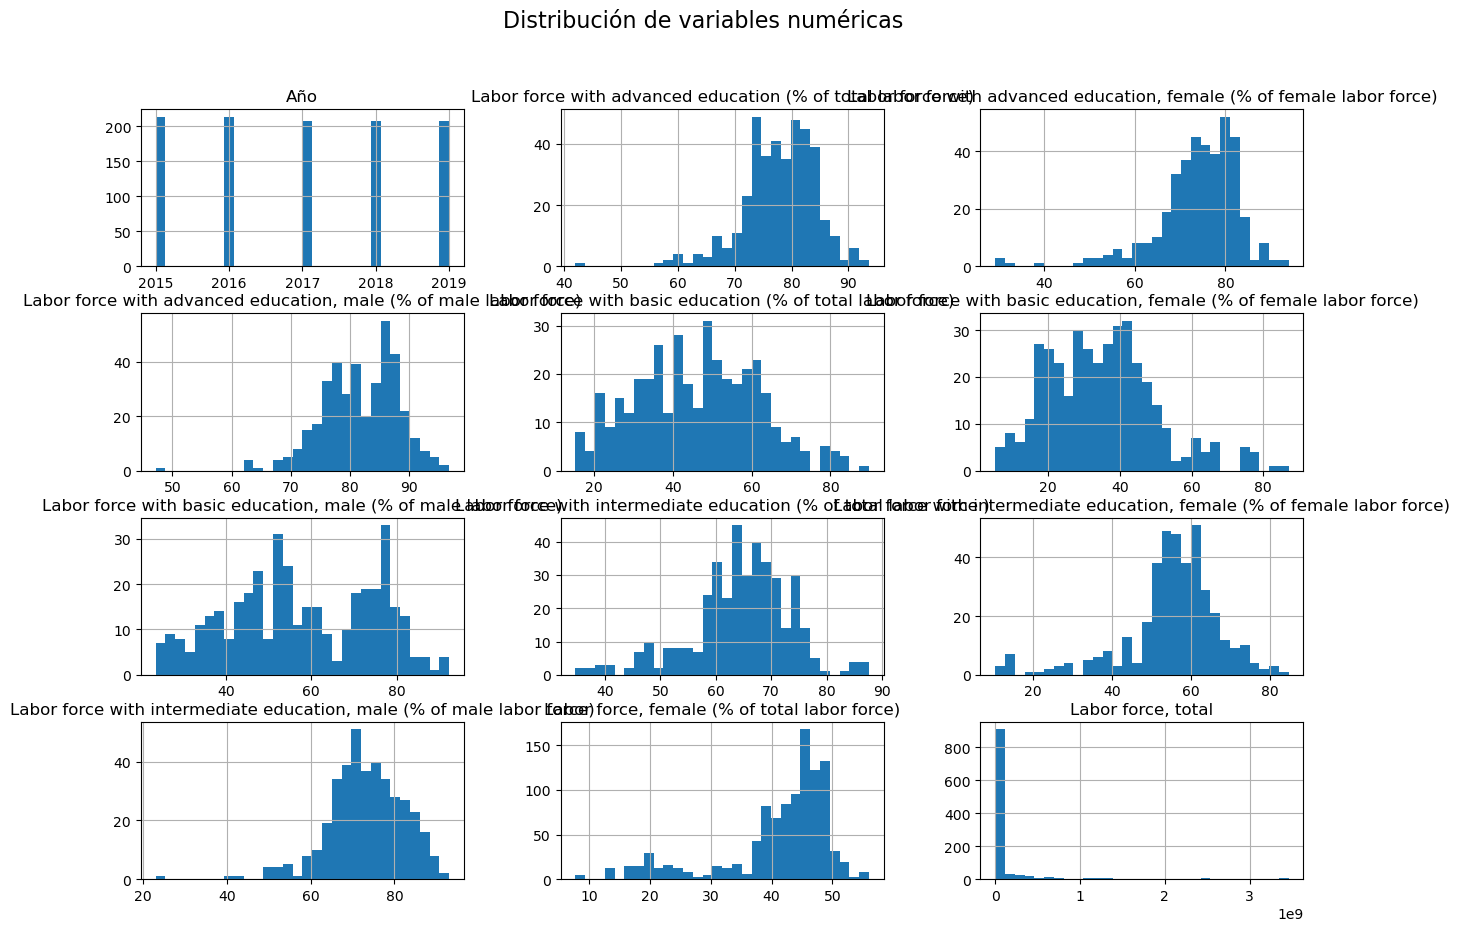

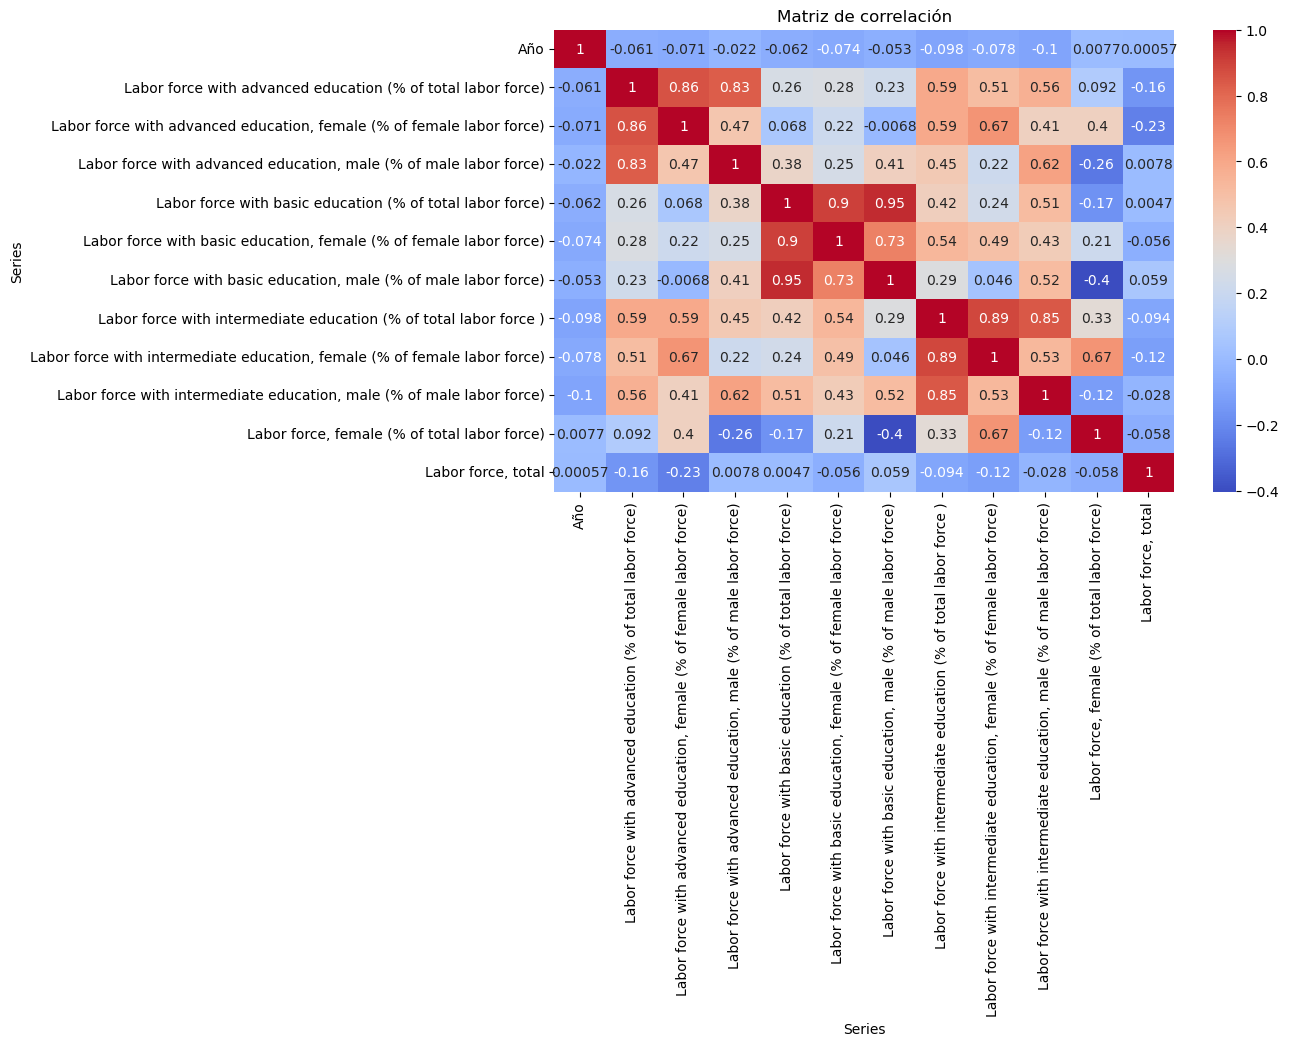

In [38]:
# Distribución de variables numéricas
df_pivot.hist(bins=30, figsize=(15,10))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()
df_pivot.isnull().sum()
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

### Modelado

In [39]:
df_pivot = df_pivot.rename(columns={'Labor force, total': 'Target'}) # Se renombra la variable Labor force total como nuestra variable objetivo

In [40]:
print(df_pivot.isnull().sum()) # Verificar valores nulos

Series
Country Name                                                                   0
Country Code                                                                   0
Año                                                                            0
Labor force with advanced education (% of total labor force)                 656
Labor force with advanced education, female (% of female labor force)        657
Labor force with advanced education, male (% of male labor force)            657
Labor force with basic education (% of total labor force)                    661
Labor force with basic education, female (% of female labor force)           661
Labor force with basic education, male (% of male labor force)               662
Labor force with intermediate education (% of total labor force )            656
Labor force with intermediate education, female (% of female labor force)    657
Labor force with intermediate education, male (% of male labor force)        657
Labor force, female (

In [41]:
df_pivot = df_pivot.dropna(subset=['Target']) # Eliminar filas con Target nulo (necesario para entrenar)
print(df_pivot.isnull().sum()) # Verificar valores nulos

Series
Country Name                                                                   0
Country Code                                                                   0
Año                                                                            0
Labor force with advanced education (% of total labor force)                 656
Labor force with advanced education, female (% of female labor force)        657
Labor force with advanced education, male (% of male labor force)            657
Labor force with basic education (% of total labor force)                    661
Labor force with basic education, female (% of female labor force)           661
Labor force with basic education, male (% of male labor force)               662
Labor force with intermediate education (% of total labor force )            656
Labor force with intermediate education, female (% of female labor force)    657
Labor force with intermediate education, male (% of male labor force)        657
Labor force, female (

In [42]:
features = df_pivot.drop(columns=['Country Name', 'Country Code', 'Año', 'Target']) # Separar features (sin target, ni país, ni año)
features

Series,Labor force with advanced education (% of total labor force),"Labor force with advanced education, female (% of female labor force)","Labor force with advanced education, male (% of male labor force)",Labor force with basic education (% of total labor force),"Labor force with basic education, female (% of female labor force)","Labor force with basic education, male (% of male labor force)",Labor force with intermediate education (% of total labor force ),"Labor force with intermediate education, female (% of female labor force)","Labor force with intermediate education, male (% of male labor force)","Labor force, female (% of total labor force)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.786208
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.817676
2,64.676697,48.643101,70.108902,51.201199,17.1604,67.444801,51.552502,18.1922,64.681198,20.897058
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.272197
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.448625
...,...,...,...,...,...,...,...,...,...,...
1045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.969786
1046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.933439
1047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.919119
1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.922197


In [43]:
features = features.fillna(features.median())# Imputar nulos con mediana
features


Series,Labor force with advanced education (% of total labor force),"Labor force with advanced education, female (% of female labor force)","Labor force with advanced education, male (% of male labor force)",Labor force with basic education (% of total labor force),"Labor force with basic education, female (% of female labor force)","Labor force with basic education, male (% of male labor force)",Labor force with intermediate education (% of total labor force ),"Labor force with intermediate education, female (% of female labor force)","Labor force with intermediate education, male (% of male labor force)","Labor force, female (% of total labor force)"
0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,18.786208
1,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,19.817676
2,64.676697,48.643101,70.108902,51.201199,17.16040,67.444801,51.552502,18.19220,64.681198,20.897058
3,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,21.272197
4,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,21.448625
...,...,...,...,...,...,...,...,...,...,...
1045,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,50.969786
1046,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,50.933439
1047,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,50.919119
1048,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,50.922197


In [44]:
# Reconstruir dataset limpio
df_pivot_clean = pd.concat([df_pivot[['Country Name', 'Country Code', 'Año', 'Target']], features], axis=1)
df_pivot_clean

Series,Country Name,Country Code,Año,Target,Labor force with advanced education (% of total labor force),"Labor force with advanced education, female (% of female labor force)","Labor force with advanced education, male (% of male labor force)",Labor force with basic education (% of total labor force),"Labor force with basic education, female (% of female labor force)","Labor force with basic education, male (% of male labor force)",Labor force with intermediate education (% of total labor force ),"Labor force with intermediate education, female (% of female labor force)","Labor force with intermediate education, male (% of male labor force)","Labor force, female (% of total labor force)"
0,Afghanistan,AFG,2015,9176450.0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,18.786208
1,Afghanistan,AFG,2016,9566712.0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,19.817676
2,Afghanistan,AFG,2017,9947922.0,64.676697,48.643101,70.108902,51.201199,17.16040,67.444801,51.552502,18.19220,64.681198,20.897058
3,Afghanistan,AFG,2018,10334090.0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,21.272197
4,Afghanistan,AFG,2019,10699525.0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,21.448625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Zimbabwe,ZWE,2015,6587744.0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,50.969786
1046,Zimbabwe,ZWE,2016,6686030.0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,50.933439
1047,Zimbabwe,ZWE,2017,6792647.0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,50.919119
1048,Zimbabwe,ZWE,2018,6907202.0,78.318199,75.193699,81.801651,47.413551,34.90135,56.439999,65.452797,56.29413,72.991299,50.922197


In [50]:
# Entrenamiento: hasta 2018
train_df = df_pivot_clean[df_pivot_clean['Año'] <= 2018]
X_train = train_df.drop(columns=['Country Name', 'Country Code', 'Año', 'Target'])
y_train = train_df['Target']

In [51]:
# Evaluación: 2019
test_df = df_pivot_clean[df_pivot_clean['Año'] == 2019]
X_test = test_df.drop(columns=['Country Name', 'Country Code', 'Año', 'Target'])
y_test = test_df['Target']

In [52]:
# Modelo Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluación del modelo

In [ ]:
# Evaluar modelo
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 118626902.20550723
R²: 0.1865497928315314


In [54]:
y_pred

array([1.59316662e+07, 2.24752572e+06, 4.69561636e+06, 1.23931856e+07,
       7.03725497e+07, 1.43412859e+07, 5.34533357e+07, 2.49184947e+08,
       2.35736004e+06, 1.26572910e+07, 1.04330164e+08, 1.06597983e+09,
       4.79697391e+06, 2.35928322e+06, 1.88890488e+07, 3.65473894e+07,
       5.20120405e+06, 4.07161938e+06, 9.26630440e+07, 3.75660476e+06,
       3.88015550e+05, 8.26681416e+07, 2.35747326e+08, 3.41965921e+07,
       6.86324667e+06, 4.90543591e+06, 1.54380664e+08, 8.88736808e+06,
       1.03532104e+07, 1.61768508e+07, 4.82908825e+07, 1.88042041e+08,
       3.95116401e+07, 1.52694292e+08, 1.40112462e+08, 7.03725497e+07,
       1.35530770e+07, 2.62262257e+07, 1.59971610e+07, 8.08672128e+07,
       3.32952530e+06, 5.03305528e+07, 1.28237240e+06, 2.01214106e+07,
       6.51346379e+06, 3.09160531e+06, 1.77340995e+06, 3.58821954e+06,
       3.51283090e+08, 1.36604858e+08, 1.11045325e+07, 1.79070522e+07,
       1.34961318e+07, 1.01001894e+08, 8.62447626e+06, 8.23477620e+05,
      

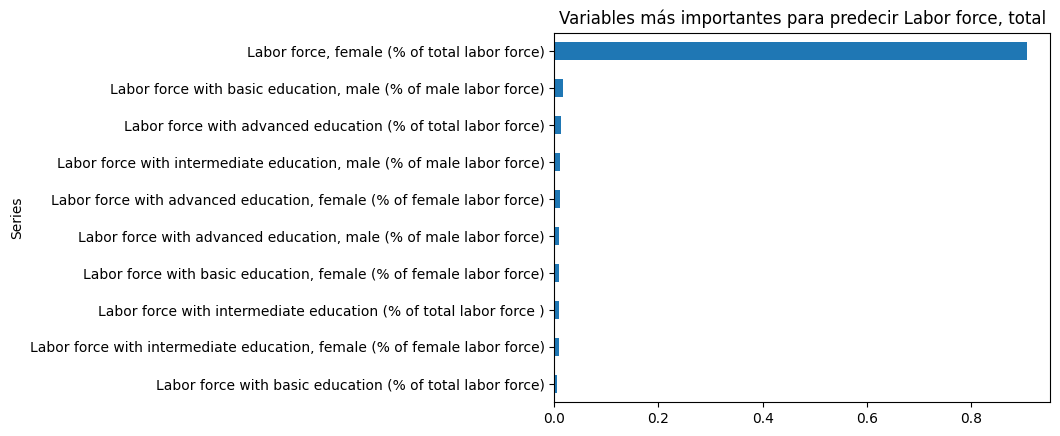

In [ ]:
# Importancia de variables
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Variables más importantes para predecir Labor force, total')
plt.gca().invert_yaxis()
plt.show()


## PREGUNTAS

1. ¿Cuáles son las características más importantes del conjunto de datos, qué significan y cómo influyen en el resultado previsto?
- Durante la fase de limpieza del conjunto de datos, se identificó que solo dos variables presentaban un nivel aceptable de completitud. Posteriormente, mediante el análisis de importancia de variables (feature importance), se evidenció que la más influyente en el modelo es "Labor force, female (% of labor force)". Esta variable representa el porcentaje de participación femenina en la fuerza laboral total de cada país, y parece estar fuertemente correlacionada con el resultado que se busca predecir. Su peso en el modelo sugiere que las dinámicas de inclusión laboral de las mujeres podrían estar asociadas con otros indicadores estructurales de desarrollo económico o social del país.
2. ¿Qué perspectivas inusuales o creativas puedes obtener del conjunto de datos?
- Una observación interesante es que, aunque el modelo se construye sobre datos disponibles por país, se evidencian vacíos importantes en la calidad y completitud de la información proporcionada por fuentes internacionales como el Banco Mundial. Esto abre la puerta a enfoques creativos como el uso de modelos de imputación inteligente, datos satelitales alternativos, o la integración con fuentes no tradicionales para enriquecer el dataset y aumentar su valor explicativo. Además, el análisis de género en el mercado laboral como predictor de variables económicas o sociales plantea una línea de análisis no tan convencional, pero prometedora.
3. ¿Qué tan preciso es el modelo que has entrenado para predecir los datos del conjunto?
- El desempeño del modelo muestra limitaciones significativas. El error absoluto medio (MAE) fue de aproximadamente 118,6 millones, lo que indica un margen de error elevado en términos absolutos. Asimismo, el coeficiente de determinación (R² = 0.1865) sugiere que el modelo apenas explica el 18.6% de la variabilidad de los datos de salida. Esto confirma que, en su estado actual, el modelo no logra captar adecuadamente la relación entre las variables predictoras y la variable objetivo.
4. ¿Qué ocurriría en un escenario creativo y predictivo utilizando el modelo que has entrenado?
- Dado el bajo poder explicativo del modelo y la limitada calidad de los datos, no es recomendable utilizar este modelo para escenarios de predicción o simulación confiables. Sin embargo, en un escenario creativo, el modelo puede servir como base para identificar vacíos de información, priorizar variables a recolectar o incluso para construir un prototipo inicial que oriente futuras iteraciones del modelo. Con un conjunto de datos más robusto y variables adicionales de valor, sería posible proyectar escenarios macroeconómicos o sociales con mayor precisión.